In [3]:
import os
import math

In [4]:
!pwd


/Users/martapiscitelli/Analisi_tesi/dati_LC/cam_345970


In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt





In [7]:
lcurve1=pd.read_csv('./plot_345970-4.cvs',
encoding='latin-1',
    sep=";"
)
print(lcurve1)


       Time  time_err  0.3-2.5keV  0.3-1keV_err   3-10keV  3-10keV_err  \
0   2287.59  0.070694    0.082391      0.006856  0.003041     0.001360   
1   2291.34  0.169178    0.123412      0.009215  0.008138     0.002515   
2   2292.08  0.433403    0.080916      0.007990  0.003695     0.001759   
3   2293.01  0.242859    0.162402      0.013666  0.007358     0.003031   
4   2294.78  0.001875    0.056563      0.014916 -0.000417     0.000158   
5   2297.04  0.068912    0.028851      0.004294 -0.000210     0.000038   
6   2297.67  0.036701    0.050443      0.006691  0.004980     0.002127   
7   2298.76  0.070046    0.107459      0.010846  0.002764     0.001845   
8   2300.37  0.002558    0.057772      0.015254  0.003367     0.003735   
9   2301.95  0.345845    0.106608      0.008181  0.001459     0.001067   
10  2303.22  0.073762    0.256669      0.016735  0.014216     0.004068   
11  2304.53  0.072824    0.108382      0.009131  0.006103     0.002179   
12  2304.97  0.113067    0.081533     

In [8]:
lcurve1.columns


Index(['Time', 'time_err', '0.3-2.5keV', '0.3-1keV_err', '3-10keV',
       '3-10keV_err', 'HR', 'HR_err', 'Unnamed: 8'],
      dtype='object')

In [9]:
lcurve1['norm_HR']  = (lcurve1['3-10keV'] - lcurve1['0.3-2.5keV']) / (lcurve1['3-10keV'] + lcurve1['0.3-2.5keV'])
#lcurve1['norm_HR'] = norm_HR

In [10]:
a_err = ((2*lcurve1['0.3-2.5keV'])/((lcurve1['0.3-2.5keV'] + lcurve1['3-10keV'])**2)*(lcurve1['3-10keV_err']))


In [11]:
#print(a_err)

In [12]:
b_err = ((2*lcurve1['3-10keV'])/((lcurve1['0.3-2.5keV'] + lcurve1['3-10keV'])**2)*(lcurve1['0.3-1keV_err']))

In [13]:
normHR_err = np.sqrt(a_err + b_err)
print(normHR_err)
lcurve1['normHR_err'] = normHR_err

0     0.190835
1     0.211040
2     0.219113
3     0.202830
4     0.041518
5     0.021782
6     0.302579
7     0.193838
8     0.378064
9     0.146712
10    0.186930
11    0.211046
12    0.204489
13    0.214018
14    0.036824
15    0.339807
16    0.178136
17    0.172818
18    0.196701
19    0.174583
20    0.204158
21    0.207437
22    0.180662
23    0.165094
24    0.245135
dtype: float64


In [14]:
lcurve1["norm_HR"]

0    -0.928809
1    -0.876275
2    -0.912659
3    -0.913313
4    -1.014854
5    -1.014664
6    -0.820291
7    -0.949847
8    -0.889858
9    -0.972998
10   -0.895040
11   -0.893383
12   -0.920864
13   -0.909580
14   -1.008900
15   -0.834932
16   -0.904546
17   -0.979477
18   -0.909192
19   -0.907449
20   -0.871810
21   -0.951633
22   -0.924582
23   -0.924970
24   -0.940209
Name: norm_HR, dtype: float64

In [15]:
lcurve1["HR"]


0     0.036907
1     0.065938
2     0.045667
3     0.045307
4    -0.007376
5    -0.007286
6     0.098724
7     0.025719
8     0.058279
9     0.013690
10    0.055386
11    0.056310
12    0.041193
13    0.047352
14   -0.004431
15    0.089957
16    0.050119
17    0.010374
18    0.047566
19    0.048523
20    0.068482
21    0.024787
22    0.039185
23    0.038978
24    0.030827
Name: HR, dtype: float64

In [16]:
lcurve1["Time"]
matrix = lcurve1.to_numpy()
t0 = matrix[0][0]
print(t0)
#t0 = 'Time'[1;1]

2287.59


In [17]:
lcurve1['Time'] = lcurve1['Time'] - t0
lcurve1["Time"]

0      0.00
1      3.75
2      4.49
3      5.42
4      7.19
5      9.45
6     10.08
7     11.17
8     12.78
9     14.36
10    15.63
11    16.94
12    17.38
13    18.78
14    21.37
15    25.11
16    29.58
17    30.87
18    31.33
19    33.39
20    34.66
21    35.42
22    36.62
23    36.99
24    40.97
Name: Time, dtype: float64

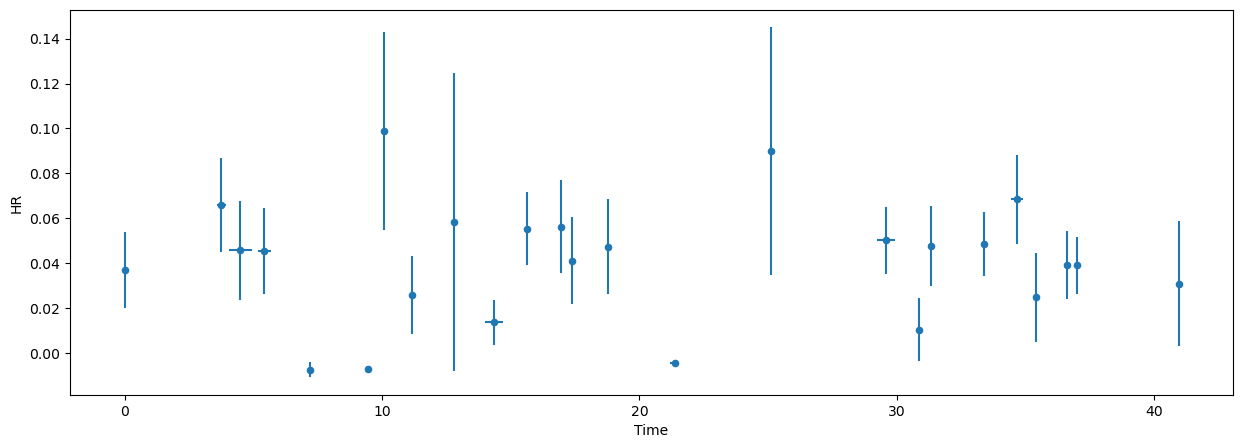

In [18]:
#lcurve['4-6keV'].plot(figsize=(15,5))
#lcurve['HR'].plot(figsize=(15,5))

lcurve1.plot(x ='Time',xerr='time_err', y='HR', yerr='HR_err', kind = 'scatter',figsize=(15,5))
plt.savefig("LC_HR4.pdf") 
plt.show()

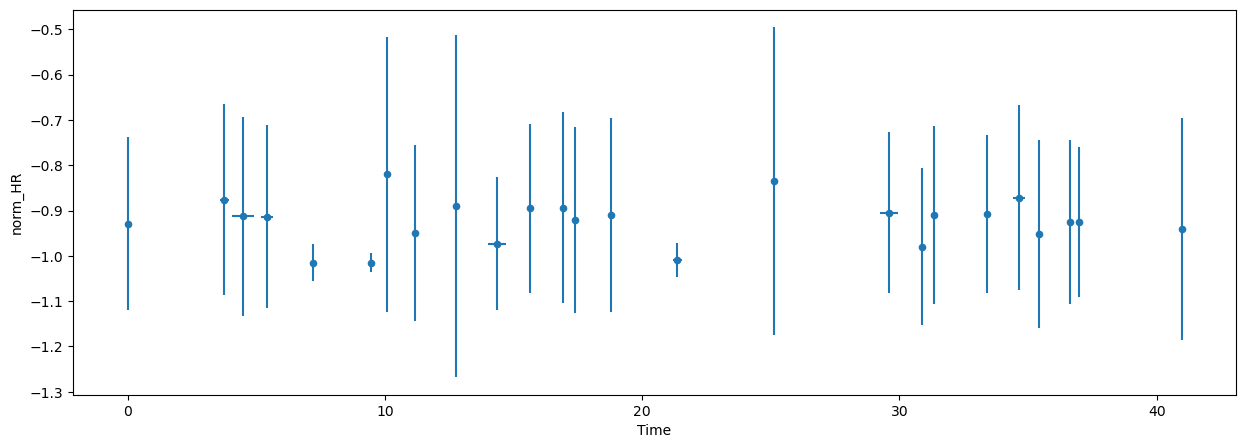

In [19]:
lcurve1.plot(x ='Time',xerr='time_err', y='norm_HR', yerr='normHR_err', kind = 'scatter',figsize=(15,5))
plt.savefig("LC_norm_HR4.pdf") 
plt.show()

In [ ]:
##

In [21]:
lcurve3=pd.read_csv('./plot_obs3_46_2040.cvs',
encoding='latin-1',
    sep=";"
)
lcurve4=pd.read_csv('./plot_obs4_46_2040.cvs',
encoding='latin-1',
    sep=";"
)
lcurve1['HR']
#lcurve3['HR']

FileNotFoundError: [Errno 2] No such file or directory: './plot_obs3_46_2040.cvs'

In [ ]:
finaldf = pd.concat([lcurve1, lcurve2,lcurve3,lcurve4])

#finaldf[:50]


In [ ]:
finaldf['Time'] =finaldf['Time']/1000
finaldf['err_time'] =finaldf['err_time']/1000
#finaldf.iloc[finaldf['Time'] < 500]
finaldf_filteredobs1=finaldf.query('Time <100')
finaldf_filteredobs2=finaldf.query('820<=Time <920')

finaldf_filteredobs3=finaldf.query('1200<=Time <1300')
finaldf_filteredobs4=finaldf.query('2550<=Time <2700')
finaldf['Time']


In [ ]:
from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()
#ax1.tick_params(labeltop='off') # don't put tick labels at the top
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
#ax1.set_xticks(ax.get_xticks()[::2])
ax2.xaxis.set_ticks(np.arange(800,920,40))


ax3.xaxis.set_ticks(np.arange(1200,1300,40))


ax4.xaxis.set_ticks(np.arange(2550,2700,40))
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)
#ax1.set_xticks(ax.get_xticks()[::1])
#ax2.set_xticks(ax.get_xticks()[::2])

#ax3.set_xticks(ax.get_xticks()[::2])

#ax4.set_xticks(ax.get_xticks()[::2])


#ax2.yaxis.set_ticks([])
#ax3.yaxis.set_ticks([])


#ax1.set_xlabel(labelcolor='none')
#ax2.yaxis.tick_right()
#ax3.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.set_xlim(-10,100) # most of the data
ax2.set_xlim(820,910) # outliers only
ax3.set_xlim(1200,1300) # outliers only
ax4.set_xlim(2550,2700) # outliers only
ax1.spines['right'].set_visible(False)

ax = finaldf_filteredobs1.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="k" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
ax.set_ylabel('4-6 keV cts/s', fontsize=18)
ax =finaldf_filteredobs2.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="m" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')

ax =finaldf_filteredobs3.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs4.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="b" ,fontsize=16, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')




In [ ]:
finaldf2 = pd.concat([lcurve1, lcurve2,lcurve3,lcurve4])


finaldf2['Time'] =finaldf2['Time']/10000
finaldf2['err_time'] =finaldf2['err_time']/10000
#finaldf.iloc[finaldf['Time'] < 500]
finaldf2_filteredobs1=finaldf2.query('Time <10')
finaldf2_filteredobs2=finaldf2.query('82<=Time <92')

finaldf2_filteredobs3=finaldf2.query('120<=Time <130')
finaldf2_filteredobs4=finaldf2.query('255<=Time <270')
#finaldf2['Time']





In [ ]:


from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()
#ax1.tick_params(labeltop='off') # don't put tick labels at the top
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
#ax1.set_xticks(ax.get_xticks()[::2])
#ax2.xaxis.set_ticks(np.arange(800,920,40))


ax3.xaxis.set_ticks(np.arange(120,130,4))


ax4.xaxis.set_ticks(np.arange(255,270,4))
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)
#ax1.set_xticks(ax.get_xticks()[::1])
#ax2.set_xticks(ax.get_xticks()[::2])

#ax3.set_xticks(ax.get_xticks()[::2])

#ax4.set_xticks(ax.get_xticks()[::2])


#ax2.yaxis.set_ticks([])
#ax3.yaxis.set_ticks([])


#ax1.set_xlabel(labelcolor='none')
#ax2.yaxis.tick_right()
#ax3.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.set_xlim(-1,10) # most of the data
ax2.set_xlim(82,91) # outliers only
ax3.set_xlim(120,130) # outliers only
ax4.set_xlim(255,270) # outliers only
ax1.spines['right'].set_visible(False)

ax = finaldf2_filteredobs1.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="k" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
ax.set_ylabel('4-6 keV cts/s', fontsize=18)
ax =finaldf2_filteredobs2.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="m" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')

ax =finaldf2_filteredobs3.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf2_filteredobs4.plot(x ='Time',xerr='err_time', y='4-6keV', yerr='4-6keV_err', marker="s",s=20, color="b" ,fontsize=16, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal


kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)


ax3.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax3.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal


ax3.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax3.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal


kwargs = dict(transform=ax4.transAxes, color='k', clip_on=False)


ax4.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax4.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal


ax1.set_ylabel('4-6 keV cts s$^{-1}$', fontsize=18)
ylim = ax1.get_ylim()
fig.text(0.5, 0.01, 'Time (10 Ksec)', ha='center', fontsize=18)

plt.savefig('4-6_colcoded.pdf')  

In [ ]:



from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()
#ax1.tick_params(labeltop='off') # don't put tick labels at the top
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
#ax1.set_xticks(ax.get_xticks()[::2])
#ax2.xaxis.set_ticks(np.arange(800,920,40))


ax3.xaxis.set_ticks(np.arange(120,130,4))


ax4.xaxis.set_ticks(np.arange(255,270,4))
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)
#ax1.set_xticks(ax.get_xticks()[::1])
#ax2.set_xticks(ax.get_xticks()[::2])

#ax3.set_xticks(ax.get_xticks()[::2])

#ax4.set_xticks(ax.get_xticks()[::2])


#ax2.yaxis.set_ticks([])
#ax3.yaxis.set_ticks([])


#ax1.set_xlabel(labelcolor='none')
#ax2.yaxis.tick_right()
#ax3.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.set_xlim(-1,10) # most of the data
ax2.set_xlim(82,91) # outliers only
ax3.set_xlim(120,130) # outliers only
ax4.set_xlim(255,270) # outliers only
ax1.spines['right'].set_visible(False)

ax = finaldf2_filteredobs1.plot(x ='Time',xerr='err_time', y='20-40keV', yerr='20-40keV_err', marker="s",s=20, color="k" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
#ax.set_ylabel('4-6 keV cts/s', fontsize=18)
ax =finaldf2_filteredobs2.plot(x ='Time',xerr='err_time', y='20-40keV', yerr='20-40keV_err', marker="s",s=20, color="m" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')

ax =finaldf2_filteredobs3.plot(x ='Time',xerr='err_time', y='20-40keV', yerr='20-40keV_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf2_filteredobs4.plot(x ='Time',xerr='err_time', y='20-40keV', yerr='20-40keV_err', marker="s",s=20, color="b" ,fontsize=16, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal


kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)


ax3.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax3.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal


ax3.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax3.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal


kwargs = dict(transform=ax4.transAxes, color='k', clip_on=False)


ax4.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax4.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal


ax1.set_ylabel('20-40 keV cts s$^{-1}$', fontsize=18)
ylim = ax1.get_ylim()
fig.text(0.5, 0.01, 'Time (10 Ksec)', ha='center', fontsize=18)

plt.savefig('20-40_colcoded.pdf')  



In [ ]:




from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()
#ax1.tick_params(labeltop='off') # don't put tick labels at the top
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
#ax1.set_xticks(ax.get_xticks()[::2])
#ax2.xaxis.set_ticks(np.arange(800,920,40))


ax3.xaxis.set_ticks(np.arange(120,130,4))


ax4.xaxis.set_ticks(np.arange(255,270,4))
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)
#ax1.set_xticks(ax.get_xticks()[::1])
#ax2.set_xticks(ax.get_xticks()[::2])

#ax3.set_xticks(ax.get_xticks()[::2])

#ax4.set_xticks(ax.get_xticks()[::2])


#ax2.yaxis.set_ticks([])
#ax3.yaxis.set_ticks([])


#ax1.set_xlabel(labelcolor='none')
#ax2.yaxis.tick_right()
#ax3.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.set_xlim(-1,10) # most of the data
ax2.set_xlim(82,91) # outliers only
ax3.set_xlim(120,130) # outliers only
ax4.set_xlim(255,270) # outliers only
ax1.spines['right'].set_visible(False)

ax = finaldf2_filteredobs1.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="k" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
#ax.set_ylabel('4-6 keV cts/s', fontsize=18)
ax =finaldf2_filteredobs2.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="m" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')

ax =finaldf2_filteredobs3.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf2_filteredobs4.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="b" ,fontsize=16, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal


kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)


ax3.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax3.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal


ax3.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax3.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal


kwargs = dict(transform=ax4.transAxes, color='k', clip_on=False)


ax4.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax4.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal


ax1.set_ylabel('HR', fontsize=18)
ylim = ax1.get_ylim()
fig.text(0.5, 0.01, 'Time (10 Ksec)', ha='center', fontsize=18)

plt.savefig('HR.pdf')  






In [ ]:
lcurve2.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', kind = 'scatter',figsize=(15,5))
plt.show()

In [ ]:
lcurve3.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', kind = 'scatter',figsize=(15,5))
plt.show()

In [ ]:
lcurve2=pd.read_csv('./obs2.cvs',
encoding='latin-1',
    sep=";"
)

In [ ]:
lcurve2.columns


In [ ]:
finaldf = pd.concat([lcurve, lcurve2,lcurve3])

In [ ]:
finaldf[:1]

In [ ]:
finaldfscaled = pd.concat([lcurve, lcurve2,lcurve3])


finaldfscaled['0.5-1.5 keV'] =finaldfscaled['0.5-1.5 keV']*2
finaldfscaled['0.5-1.5 keV_err'] = finaldfscaled['0.5-1.5 keV_err']*2
finaldfscaled[:1]

In [ ]:
from matplotlib import cm
import matplotlib.gridspec as gridspec

#ax=finaldf.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err',  marker="s", s=20, color="b" ,kind = 'scatter',figsize=(15,5))
#plt.show()
#plt.savefig('hard_lc.pdf')
#soft=finaldf['0.5-1.5 keV']*2
finaldf = pd.concat([lcurve, lcurve2,lcurve3])

finaldf['Time'] =finaldf['Time']/1000
finaldf['err_time'] =finaldf['err_time']/1000

finaldfscaled = pd.concat([lcurve, lcurve2,lcurve3])
finaldfscaled['0.5-1.5 keV'] =finaldfscaled['0.5-1.5 keV']*2
finaldfscaled['0.5-1.5 keV_err'] = finaldfscaled['0.5-1.5 keV_err']*2
finaldfscaled['Time'] =finaldfscaled['Time']/1000
finaldfscaled['err_time'] =finaldfscaled['err_time']/1000

fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1.5])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1.set_ylim(-0.001, 0.21)
ax1.set_yticks([0.05,0.1,0.15,0.2])
ax1=finaldf.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err',  marker="s", s=20, color="b" ,fontsize=18, kind = 'scatter',ax=ax1, figsize=(15,5))
ax1=finaldfscaled.plot(x ='Time',xerr='err_time', y='0.5-1.5 keV', yerr='0.5-1.5 keV_err', fontsize=18, marker="s", s=20, color="r" ,  kind = 'scatter',ax=ax1, figsize=(15,5))

ax2=finaldf.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err',  marker="s", s=20, color="b" , fontsize=18, kind = 'scatter',ax=ax2, figsize=(15,5))
ax2=finaldfscaled.plot(x ='Time',xerr='err_time', y='0.5-1.5 keV', yerr='0.5-1.5 keV_err', fontsize=18, marker="s", s=20, color="r" ,  kind = 'scatter',ax=ax2, figsize=(15,5))


ax1.set_xlim(-10,450) # most of the data
ax2.set_xlim(850,1540) # outliers only

plt.subplots_adjust(wspace=0.05, hspace=0)

#fig,(ax1,ax2) = plt.subplots(1, 2,  sharey=True)
#ax1.set_xlim(-10,450) # most of the data
#ax2.set_xlim(850,1540) # outliers only
#ax1.tick_params(labeltop='off') # don't put tick labels at the top
#ax2.tick_params(labeltop='off') # don't put tick labels at the top

#ax1.spines['right'].set_dashes(5,1)


#ax1.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
ax1.set_xlabel('')
ax2.set_xlabel('')


ax2.set_ylabel('')
ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.set_aspect("auto")
ax2.yaxis.get_ticks_position


ax1.yaxis.tick_left()
ax2.yaxis.set_ticks_position("none")
ax2.set_yticklabels([])

#ax2.yaxis.set_ticks_position("right")
#ax2.set_yticklabels([])


#ax1.tick_params(labeltop='off') # don't put tick labels at the top

#

ax1.set_ylim(-0.001, 0.21)
ax1.set_yticks([0.05,0.1,0.15,0.2])
#ylim = ax1.get_ylim()
ax2.set_ylim(-0.001, 0.21)



xlim1 = [-10, 450]
xlim2 = [850, 1540]
xlim1ratio = (xlim1[1]-xlim1[0])/(xlim2[1]-xlim2[0]+xlim1[1]-xlim1[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(xlim2[1]-xlim2[0]+xlim1[1]-xlim1[0])


kwargs = dict(color='k', clip_on=False)
ylim = [-0.001, 0.21]
dy = .02*(ylim[1]-ylim[0])
dx = .01*(xlim1[1]-xlim1[0])/xlim1ratio
 
#ax1.plot((xlim1[1]-dx,xlim1[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
ax1.plot((xlim1[1]-dx,xlim1[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs) ##bot-left diagonal
ax1.plot((xlim1[1]-dx,xlim1[1]+dx), (ylim[1]-dy,ylim[1]+dy), **kwargs) ## top-lef diagonal
#ax2.plot((xlim2[0]-dx,xlim2[0]+dx), (ylim[1]+2*dy,ylim[1]+4*dy), **kwargs)
dx = .01*(xlim2[1]-xlim2[0])/xlim2ratio
dy = .02*(ylim[1]-ylim[0])


ax2.plot((xlim2[0]-dx,xlim2[0]+dx), (ylim[1]-dy,ylim[1]+dy), **kwargs)
ax2.plot((xlim2[0]-dx,xlim2[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)



#ax1.plot((1- dx, 1 + dx), (-d, +d), **kwargs)  # top-right diagonal
#ax1.plot((1-dx,  1+dx), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#ax2.plot((-dx,  dx), (1-dy, 1+dy), **kwargs)  # top-right diagonal
#ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal



#ax2.tick_params(labeltop='off') # don't put tick labels at the top

ax1.set_ylabel('COUNT RATE s$^{-1}$', fontsize=18)
ylim = ax1.get_ylim()
fig.text(0.5, 0.01, 'Time (Ksec)', ha='center', fontsize=18)




In [ ]:
ylim
#ylim = ax1.get_ylim()

#ylim


In [ ]:
from matplotlib import cm

fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()

#ax1.set_xlabel(labelcolor='none')

finaldf = pd.concat([lcurve, lcurve2,lcurve3])
finaldf['Time'] =finaldf['Time']/1000
finaldf['err_time'] =finaldf['err_time']/1000




ax2.yaxis.tick_right()
ax1.set_xlim(-10,450) # most of the data
ax2.set_xlim(850,1540) # outliers only
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax = finaldf.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="g" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
ax.set_ylabel('0.5-1.5 keV/3-10 keV', fontsize=18)
ax =finaldf.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="g" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')

ax.tick_params(labeltop='off') # don't put tick labels at the top


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal



# hide the spines between ax and ax2

#plt.savefig('HR2.pdf')  
#fig.set_xlabel('value')
#fig.text(0.04, 0.5, 'common Y', va='center',fontsize=18, rotation='vertical')

fig.text(0.5, 0.01, 'Time (Ksec)', ha='center', fontsize=18)



# zoom-in / limit the view to different portions of the data
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()
#plt.savefig('HR_new.pdf')  




In [ ]:
ylim[1]



In [ ]:
lcurve3=pd.read_csv('./obs3.cvs',
encoding='latin-1',
    sep=";"
)

In [ ]:
finaldf2 = pd.concat([lcurve, lcurve2, lcurve3])

In [ ]:
lcurve3



In [ ]:
lcurve2


In [ ]:
from scipy import misc
from scipy import stats


In [ ]:
plt?

In [ ]:
finaldf = pd.concat([lcurve, lcurve2,lcurve3])



finaldf['Time'] =finaldf['Time']/1000
finaldf['err_time'] =finaldf['err_time']/1000
#finaldf.iloc[finaldf['Time'] < 500]
finaldf_filtered400=finaldf.query('Time <400')
finaldf_filtered450=finaldf.query('400<=Time <500')

finaldf_filtered1250 =finaldf.query('500<=Time <1250')
finaldf_filtered1600 =finaldf.query('1250<=Time <1600')


#finaldf_filtered2



In [ ]:
from matplotlib import cm

fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()
ax.tick_params(labeltop='off') # don't put tick labels at the top

#ax1.set_xlabel(labelcolor='none')

ax2.yaxis.tick_right()
ax1.set_xlim(-10,450) # most of the data
ax2.set_xlim(850,1540) # outliers only
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax = finaldf_filtered400.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="k" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
ax.set_ylabel('0.5-1.5 keV/3-10 keV', fontsize=18)
ax = finaldf_filtered450.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="m" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')



ax =finaldf_filtered1250.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filtered1600.plot(x ='Time',xerr='err_time', y='HR', yerr='HR_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal

fig.text(0.5, 0.01, 'Time (Ksec)', ha='center', fontsize=18)



# zoom-in / limit the view to different portions of the data
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()
plt.savefig('HR_colcoded.pdf')  



In [ ]:
from matplotlib import cm

fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

#ax1.set_xlim(-1000, 450000)
#ax2.set_xlim(800000, 155000)
ax1.yaxis.tick_left()
ax.tick_params(labeltop='off') # don't put tick labels at the top

#ax1.set_xlabel(labelcolor='none')

ax2.yaxis.tick_right()
ax1.set_xlim(-10,450) # most of the data
ax2.set_xlim(850,1540) # outliers only
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax = finaldf_filtered400.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', marker="s",s=20, color="k" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')
ax.set_ylabel('0.5-1.5 keV/3-10 keV', fontsize=18)
ax = finaldf_filtered450.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', marker="s",s=20, color="m" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
ax.set_xlabel('')

ax.set_ylabel('COUNT RATE s$^{-1}$', fontsize=18)
ax.set_ylim(-0.001, 0.21)
ax.set_yticks([0.05,0.1,0.15,0.2])

ax =finaldf_filtered1250.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filtered1600.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1- d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1-d,  1+d), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((- d,  d), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal

fig.text(0.5, 0.01, 'Time (Ksec)', ha='center', fontsize=18)



# zoom-in / limit the view to different portions of the data
plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.show()
plt.savefig('hard_lc_colcoded.pdf')  
plt.savefig('hard_lc_colcoded.eps', format='eps')




In [ ]:
finaldf = pd.concat([lcurve, lcurve2,lcurve3])



finaldf['Time'] =finaldf['Time']/1000
finaldf['err_time'] =finaldf['err_time']/1000
#finaldf.iloc[finaldf['Time'] < 500]
finaldf_filtered400=finaldf.query('Time <400')
finaldf_filtered450=finaldf.query('400<=Time <500')

finaldf_filtered1250 =finaldf.query('500<=Time <1250')
finaldf_filtered1600 =finaldf.query('1250<=Time <1600')


#finaldf_filtered2



In [ ]:
from matplotlib import cm
import matplotlib.gridspec as gridspec

#ax=finaldf.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err',  marker="s", s=20, color="b" ,kind = 'scatter',figsize=(15,5))
#plt.show()
#plt.savefig('hard_lc.pdf')
#soft=finaldf['0.5-1.5 keV']*2


ax1.set_ylim(-0.001, 0.21)
ax1.set_yticks([0.05,0.1,0.15,0.2])
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1.5])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1=finaldf_filtered400.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err',  marker="s", s=20, color="k" ,fontsize=18, kind = 'scatter',ax=ax1, figsize=(15,5))
ax1=finaldf_filtered450.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', fontsize=18, marker="s", s=20, color="m" ,  kind = 'scatter',ax=ax1, figsize=(15,5))

ax2=finaldf_filtered1250.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err',  marker="s", s=20, color="r" , fontsize=18, kind = 'scatter',ax=ax2, figsize=(15,5))
ax2=finaldf_filtered1600.plot(x ='Time',xerr='err_time', y='3-10 keV', yerr='3-10 keV_err', fontsize=18, marker="s", s=20, color="b" ,  kind = 'scatter',ax=ax2, figsize=(15,5))


ax1.set_xlim(-10,450) # most of the data
ax2.set_xlim(850,1540) # outliers only

plt.subplots_adjust(wspace=0.05, hspace=0)

#fig,(ax1,ax2) = plt.subplots(1, 2,  sharey=True)
#ax1.set_xlim(-10,450) # most of the data
#ax2.set_xlim(850,1540) # outliers only
#ax1.tick_params(labeltop='off') # don't put tick labels at the top
#ax2.tick_params(labeltop='off') # don't put tick labels at the top

#ax1.spines['right'].set_dashes(5,1)


#ax1.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
ax1.set_xlabel('')
ax2.set_xlabel('')


ax2.set_ylabel('')
ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.set_aspect("auto")
ax2.yaxis.get_ticks_position


ax1.yaxis.tick_left()
ax2.yaxis.set_ticks_position("none")
ax2.set_yticklabels([])

#ax2.yaxis.set_ticks_position("right")
#ax2.set_yticklabels([])


#ax1.tick_params(labeltop='off') # don't put tick labels at the top

#

ax1.set_ylim(-0.001, 0.21)
ax1.set_yticks([0.05,0.1,0.15,0.2])
#ylim = ax1.get_ylim()
ax2.set_ylim(-0.001, 0.21)



xlim1 = [-10, 450]
xlim2 = [850, 1540]
xlim1ratio = (xlim1[1]-xlim1[0])/(xlim2[1]-xlim2[0]+xlim1[1]-xlim1[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(xlim2[1]-xlim2[0]+xlim1[1]-xlim1[0])


kwargs = dict(color='k', clip_on=False)
#ylim = [-0.001, 0.21]
dy = .02*(ylim[1]-ylim[0])
dx = .01*(xlim1[1]-xlim1[0])/xlim1ratio
 
#ax1.plot((xlim1[1]-dx,xlim1[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
ax1.plot((xlim1[1]-dx,xlim1[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs) ##bot-left diagonal
ax1.plot((xlim1[1]-dx,xlim1[1]+dx), (ylim[1]-dy,ylim[1]+dy), **kwargs) ## top-lef diagonal
#ax2.plot((xlim2[0]-dx,xlim2[0]+dx), (ylim[1]+2*dy,ylim[1]+4*dy), **kwargs)
dx = .01*(xlim2[1]-xlim2[0])/xlim2ratio
dy = .02*(ylim[1]-ylim[0])


ax2.plot((xlim2[0]-dx,xlim2[0]+dx), (ylim[1]-dy,ylim[1]+dy), **kwargs)
ax2.plot((xlim2[0]-dx,xlim2[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)



#ax1.plot((1- dx, 1 + dx), (-d, +d), **kwargs)  # top-right diagonal
#ax1.plot((1-dx,  1+dx), (1-d, 1+d), **kwargs)  # top-right diagonal

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#ax2.plot((-dx,  dx), (1-dy, 1+dy), **kwargs)  # top-right diagonal
#ax2.plot((-d,  +d), (-d, +d), **kwargs)  # top-right diagonal



#ax2.tick_params(labeltop='off') # don't put tick labels at the top

ax1.set_ylabel('COUNT RATE s$^{-1}$', fontsize=18)
ylim = ax1.get_ylim()

fig.text(0.5, 0.01, 'Time (Ksec)', ha='center', fontsize=18)

fig.text(0.27, 0.43, '(i)', ha='left', fontsize=18, color='k')


fig.text(0.37, 0.6, '(ii)', ha='left', fontsize=18, color='m')

fig.text(0.54, 0.43, '(iii)', ha='left', fontsize=18, color='r')
fig.text(0.82, 0.43, '(iv)', ha='left', fontsize=18, color='b')




plt.savefig('LC_colcoded_diffsize.pdf')  

plt.savefig('LC_colcoded_diffsize.eps', format='eps')


